# Project Name

Authors: Charles Atchison, Marley Robinson, Johnathon Smith

Date: Nov 03, 2021
***

### Executive Summary
***

__Project Goal__

The goal of this project is to build a model that can accurately predict the primary programming language of a Github repository based on the content of the repository's README file.

__Overall Findings__

* Repositories composed primarily of Javascript have README files with consistent, identifiable characteristics which allow for accurate prediction of the primary language.
* 
* 

__Recommendations__

* 
* 
***

### Project Plan

* Write a README.md file that details our process, findings, and instructions on how to recreate the project.
* Acquire the Data:
    * Scrape Github repositories for README files and programming languages
* Prepare the data:
    * Convert all characters to lowercase,
    * Normalize unicode characters,
    * Encode into ascii byte strings and ignored unknown characters,
    * Decode into usable UTF-8 strings,
    * Remove anything that was not either a letter, number, or whitespace,
    * Tokenize the data.
    * Create stemmed and lemmatized versions of the data
* Split the Data:
    * Split into train and test sets. A validate set will not be needed since we will be using cross-validation methods in our modeling section.
* Explore the Data:
    * Use only the train data set
    * Investigate differences between README files for the different primary languages
    * Create relevant visualizations
    * Perform statistical analysis and test at least three different hypotheses.
* Model the Data:
    * Create a baseline
    * Create several different models
    * Choose the best model
    * Evaluate best model on test data set
* Document conclusions, takeaways, and next steps in the Final Report Notebook.
***

### Necessary Imports

In [5]:
from acquire_c import *
from prepare_c import *
from explore_c import *
from model_m import *

import scipy.stats as stats

## Acquire
***

__Data Dictionary__

| Feature           | Datatype                         | Definition                                                 |
|:------------------|:---------------------------------|:-----------------------------------------------------------|
| prog_lang         | 5728 non-null: object           | The predominant programming language used in the repository|
| original          | 5728 non-null: object           | Original readme content of the scraped repository          |
| cleaned           | 5728 non-null: object           | The cleaned version of the readme                          |
| label             | 5728 non-null: object           | The programming language label; the target variable
| stemmed           | 5728 non-null: object           | The cleaned, stemmed version of the readme                 |
| lemmatized        | 5728 non-null: object           | The cleaned, lemmatized version of the readme              |

__Load the Data__

This data was originally scraped from Github repositories. We ended up scraping approximately 30,000 different repositories and crafted several different datasets from them. Since it is unreasonable to include this process in the final report, the datasets will all be available as downloadable .csv files on Kaggle. You can find them here: 

For this final report, we will be using the file 'javascript_clean_readme_100_z0_5.csv'.

In [7]:
#Load the dataset
df = pd.read_csv('javascript_clean_readme_100_z0_5.csv', index_col = [0])

In [3]:
#Provide a brief overview of the prepared dataframe
df.head()

,prog_lang,original,cleaned,label,stemmed,lemmatized
0,JavaScript,abhisheknaiidu The CLI Table of Contents Ins...,cli table contents installation built license ...,javascript,cli tabl content instal built licens instal en...,cli table content installation built license i...
2,JavaScript,Hacktoberfest 2020 🎉 🗣 Hacktoberfest encour...,open source community every year complete chal...,javascript,open sourc commun everi year complet challeng ...,open source community every year complete chal...
4,JavaScript,🚧 Todoist Stats ⚡️ 📌 Update your Todoist Sta...,stats update stats setup work youll need api t...,javascript,stat updat stat setup work youll need api toke...,stats update stats setup work youll need api t...
8,JavaScript,Awesome Github Profile README A curated list o...,awesome github profile readme list awesome git...,javascript,awesom github profil readm list awesom github ...,awesome github profile readme list awesome git...
70,JavaScript,Team Profile Generator Description The purpose...,team profile generator description purpose pro...,javascript,team profil gener descript purpos project crea...,team profile generator description purpose pro...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5728 entries, 0 to 6582
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   prog_lang   5728 non-null   object
 1   original    5728 non-null   object
 2   cleaned     5728 non-null   object
 3   label       5728 non-null   object
 4   stemmed     5728 non-null   object
 5   lemmatized  5728 non-null   object
dtypes: object(6)
memory usage: 313.2+ KB


__Key Takeaways__

* Target Variable: label
* This dataframe currently has 5,728 rows and 6 columns.
* There are 0 missing values.
* All columns are string object types.

### Split the Data

Since we will be using cross-validation methods in our modeling stage, we will not need a validate set. Here, we will split the data into train and test sets.

In [5]:
# Split the data 
train, test = split(df)

***

## Explore

For our explore section, we utilized a class. The following cell will instantiate the class object. At the same time, the label column will be updated. All labels already labeled as 'javascript' will remain the same, but all others will be changed to 'not_javascript'.

In [6]:
#Set the designated language
lang = 'javascript'
not_lang = f'not_{lang}'

#Instantiate the object
java_obj = NLP_explore(train, 'label', 'cleaned', lang, not_lang)

__Do the top 5 most frequent words in the Javascript README files occur just as frequently in all others?__

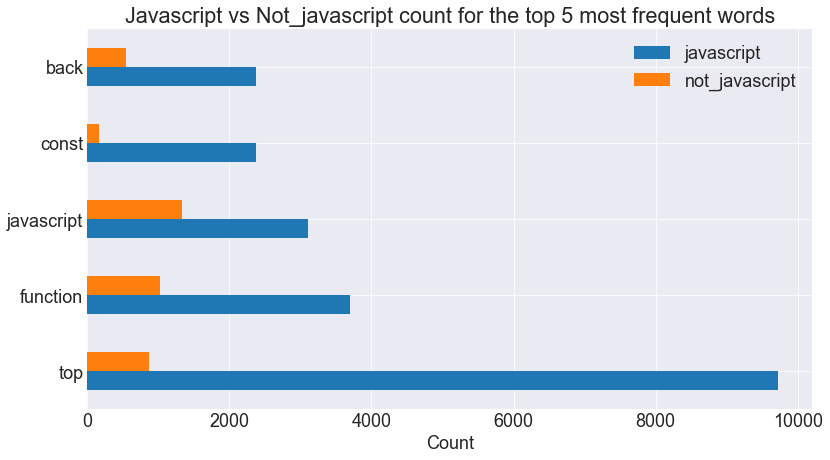

In [7]:
# Looking at just JavaScript hplot
java_obj.hplot_word_freq_viz(n=5, sort=lang)

__Key Takeaway__

Clearly, the most frequent words in javascript README files occur much less frequently in all other README files. This could be a discerning characteristic and may be useful for modeling.

__Do the top 5 most frequent words in all 'not_javascript' README files occur just as frequently in Javascript README files?__

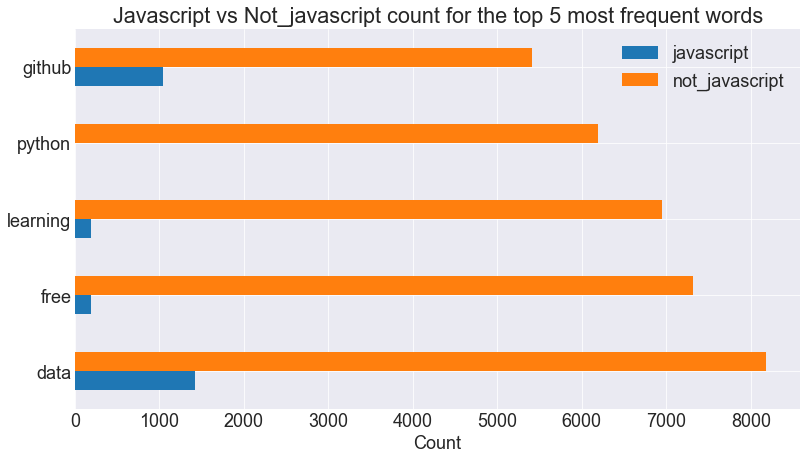

In [8]:
# The following will plot the top 5 most frequent word counts for 'not_javascript' README files
java_obj.hplot_word_freq_viz(n=5, sort=not_lang)

__Key Takeaway__

The most common words in 'not_javascript' README files do not occur nearly as often in Javascript README files. Again, this could be a useful characteristic.

### Add Sentiment Analysis and Other Features

Here, we will add sentiment analysis scores and other features like message length, word count, and average word length.

In [9]:
# Add sentiment analysis
java_obj.add_sentiment_analysis()
# Add features
java_obj.add_features()

#Take a look at the new dataframe
java_obj.df.head()

,prog_lang,original,cleaned,label,stemmed,lemmatized,neg,neu,pos,compound,message_length,word_count,unique_word_count,avg_word_len
2611,Kotlin,Projeto utilizando Kotlin pela primeira vez,projeto kotlin,not_javascript,projeto kotlin,projeto kotlin,0.000,1.000,0.000,0.0000,14,2,"{'projeto': 1, 'kotlin': 1}",7.00
122,Java,JcPlayer New features Raw files Asset Files Lo...,new features raw files files local files teste...,not_javascript,new featur raw file file local file test file ...,new feature raw file file local file tested fi...,0.000,0.850,0.150,0.9246,669,106,"{'add': 5, 'files': 4, 'player': 4, 'playlist'...",6.31
6278,C#,Design Patterns Written in Unity3D This reposi...,design patterns written repository cool design...,not_javascript,design pattern written repositori cool design ...,design pattern written repository cool design ...,0.000,0.983,0.017,0.3182,1057,137,"{'pattern': 36, 'patterns': 13, 'design': 4, '...",7.72
6098,Python,PythonRobotics Python codes for robotics algor...,python codes algorithm table contents requirem...,not_javascript,python code algorithm tabl content requir use ...,python code algorithm table content requiremen...,0.003,0.882,0.115,0.9983,6522,910,"{'path': 59, 'planning': 54, 'ref': 31, 'contr...",7.17
3448,Python,DCGAN-TensorFlow-Image-Gen An implementation o...,implementation keras tensorflow backend genera...,not_javascript,implement kera tensorflow backend gener imag r...,implementation kera tensorflow backend generat...,0.000,0.796,0.204,0.9403,609,81,"{'notebook': 4, 'jupyter': 4, 'python': 3, 'im...",7.52


__Is there a difference in sentiment analysis scores between Javascript README files and 'not_javascript' README files?__

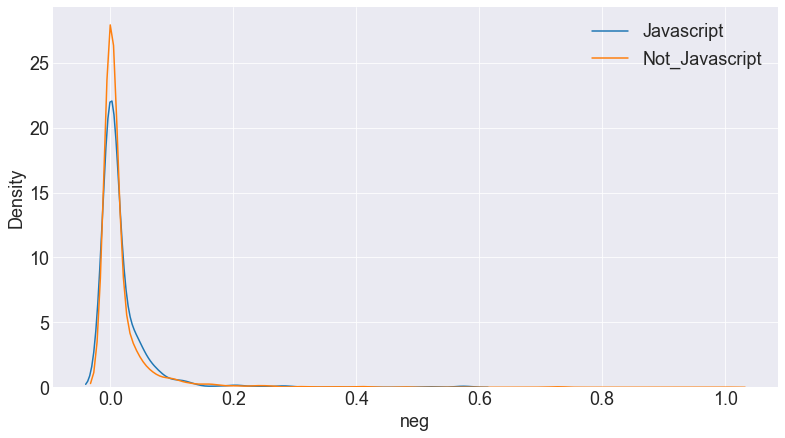

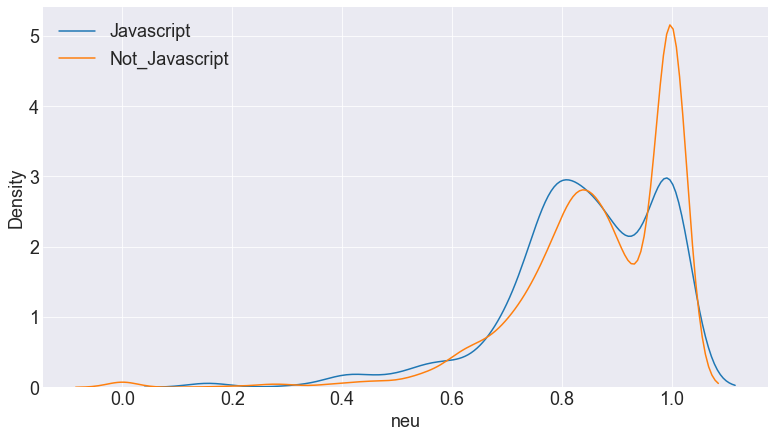

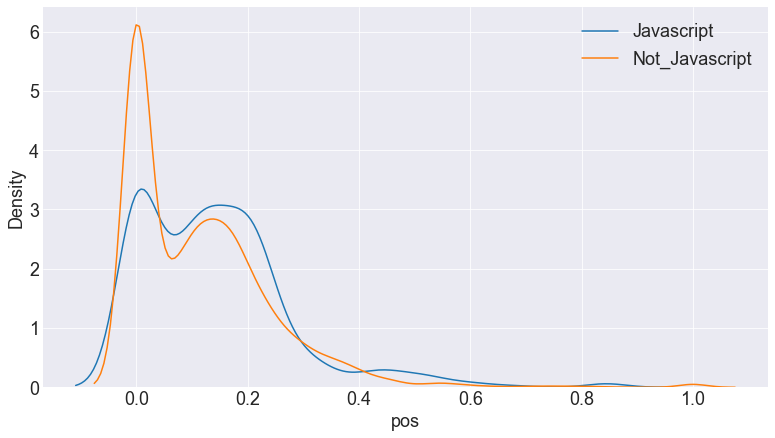

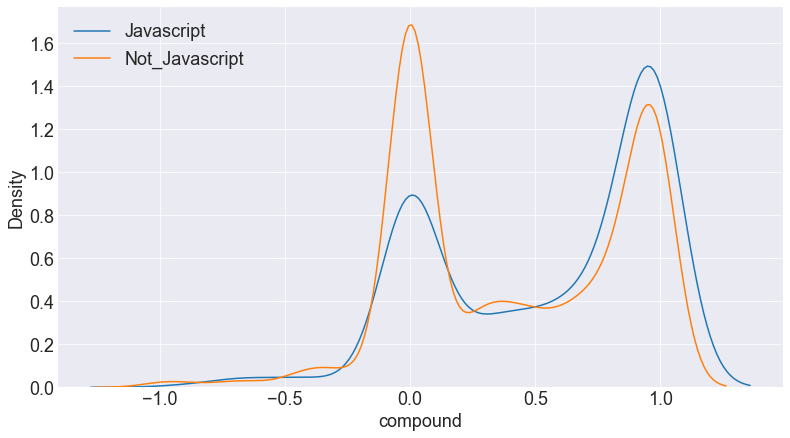

In [10]:
#The following will plot the negative, neutral, positive, and compound score densities
java_obj.sentiment_distributions()

__Key Takeaway__

Javascript sentiment analysis compound scores tend to be more positive than all others, while all others tend to be more neutral than Javascript. Neither appear to be negative.

### Statistical Analysis
***
#### Hypothesis 1

__Is there a significant difference in the message lengths of Javascript README files when compared to others?__

$H_0$: The average message length of Javascript README files == The average message length of all other README files.
    
$H_a$: The average message length of Javascript README files != The average message length of all other README files.

alpha = 0.05

In [12]:
#The following performs a two sample ttest, assuming unequal variances
t, p = stats.ttest_ind(java_obj.df[df.label == lang].message_length, java_obj.df[df.label == not_lang].message_length, equal_var = False)
t, p

(2.075149855993917, 0.03826510004978409)

Since the p-value is less than 0.05, we reject the null hypothesis. The average message length of Javascript README files is significantly different than the average message length of all other README files.

#### Hypothesis 2

__Is there a significant difference in compound sentiment analysis scores between Javascript README files and all others?__

$H_0$: The average compound sentiment analysis score for Javascript README files == The average compound sentiment analysis score for all other README files.
    
$H_a$: The average compound sentiment analysis score for Javascript README files != The average compound sentiment analysis score for all other README files.

alpha = 0.05

In [13]:
#The following performs a two sample ttest, assuming unequal variances
t, p = stats.ttest_ind(java_obj.df[df.label == lang].compound, java_obj.df[df.label == not_lang].compound, equal_var = False)
t, p

(7.511380010833857, 1.248954457305846e-13)

Since the p-value is less than alpha, we reject the null hypothesis. The average compound sentiment analysis score for Javascript README files is significantly different than the average compound sentiment analysis score for all other README files.

#### Hypothesis 3

__Is there a significant difference in average word lengths between javascript README files and all others?__

$H_0$: The average avg_word_len for Javascript README files == The average avg_word_len for all other README files.
    
$H_a$: The average avg_word_len for Javascript README files != The average avg_word_len for all other README files.

alpha = 0.05

In [14]:
#The following performs a two sample ttest, assuming unequal variances
t, p = stats.ttest_ind(java_obj.df[df.label == lang].avg_word_len, java_obj.df[df.label == not_lang].avg_word_len, equal_var = False)
t, p

(-8.226950484623886, 4.836248593524612e-16)

Since the p-value is less than 0.05, we reject the null hypothesis. The average avg_word_len for Javascript README files is significantly different than the average avg_word_len of all other README files.

#### Hypothesis 4

__Is there a significant difference between average word counts between Javascript README files and all others?__

$H_0$: The average word_count for Javascript README files == The average word_count for all other README files.

$H_a$: The average word_count for Javascript README files != The average word_count for all other README files.

alpha = 0.05

In [15]:
#The following performs a two sample ttest, assuming unequal variances
t, p = stats.ttest_ind(java_obj.df[df.label == lang].word_count, java_obj.df[df.label == not_lang].word_count, equal_var = False)
t, p

(2.3975628542624277, 0.01671790833729101)

Since the p-value is less than 0.05, we reject the null hypothesis. The average word_count for Javascript README files is significantly different than the average word_count of all other README files.

***
## Model and Evaluate
For modeling we created a class as well which will create a modeling object following the imports. This object has many attributes and methods that will facilitate the training of a list of classifier models via cross validation and then evaluate the best model on the test data.

In [2]:
# Model imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier

Below we specify 2 lists, one of the names of the models and another of the classifiers themselves

In [3]:
# Names of chosen classifiers in a list
names = ['K Nearest Neighbors', 'Decision Tree', 'Random Forest', 
         'Gaussian N-Bayes', 'Multinomial N-Bayes']

# Classifiers themselves in a list
classifiers = [
    KNeighborsClassifier(n_neighbors = 6),
    DecisionTreeClassifier(max_depth = 7),
    RandomForestClassifier(n_estimators = 10),
    GaussianNB(),
    MultinomialNB(alpha = .5)
    ]

Here we instantiate the object, feeding it the cleaned, stemmed, and lemmatized df, the list of classifiers and their names, and finally the language we are going to be evaluating accuracy on.

In [8]:
# Create model object from class
model_obj = NLP_model(df, classifiers, names, lang = 'JavaScript')

#### Metrics method:
- Performs count vectorization of the dataframe, turning each lemmatized vector into a feature
- Splits the vectorized data into train and test
- Performs cross validation on the train data with the models
    - Fits models on n-1 splits of the train data and evaluates on the remaining n subset
    - Iterates so that each split in the train data is both fit and evaluated on
- Returns a ranked/sorted metrics df of the average score of all the train splits for each classifier type as the validate accuracy

For more information on cross validation visit https://scikit-learn.org/stable/modules/cross_validation.html for documentation.

In [9]:
# Metrics attribute will preform cross validation and return average score of each classifier type
metric_df = model_obj.metrics(splits = 10)
metric_df

Have not run count_vectorize method yet, running now...
Creating vectorized dataframe now. Vectorization may take a while, please wait...
All done! Moving on to modeling, this may take a while...
K Nearest Neighbors: Validate accuracy: 0.8900091332020436
Decision Tree: Validate accuracy: 0.9295026210387116
Random Forest: Validate accuracy: 0.9251391386248823
Gaussian N-Bayes: Validate accuracy: 0.9172855362426388
Multinomial N-Bayes: Validate accuracy: 0.9412896842385668


,model,average_accuracy%
4,Multinomial N-Bayes,94.13
1,Decision Tree,92.95
2,Random Forest,92.51
3,Gaussian N-Bayes,91.73
0,K Nearest Neighbors,89.00


#### Test on Best method:
- Takes list of the models for each split in the cross validation and pulls the best scoring pre-fit model to evaluate on test data.
- Returns the model, prints its test score and its validate score for comparison.

In [10]:
# Evaluating on test data for best model
model_obj.test_on_best()

Best model: MultinomialNB(alpha=0.5)
Validate score: 95.42%
Test Score: 94.8%


MultinomialNB(alpha=0.5)

### Model Performance Summary

#### Classifier Hyperparameters:
- KNeighborsClassifier(n_neighbors = 6),
- DecisionTreeClassifier(max_depth = 7),
- RandomForestClassifier(n_estimators = 10),
- GaussianNB(),
- MultinomialNB(alpha = .5)
    
#### Average Validation Scores:
- K Nearest Neighbors accuracy: 0.8900091332020436
- Decision Tree accuracy: 0.9295026210387116
- Random Forest accuracy: 0.9251391386248823
- Gaussian N-Bayes accuracy: 0.9172855362426388
- Multinomial N-Bayes accuracy: 0.9412896842385668

### Best Model Scores:
Model: Multinomial Naive Bayes, alpha = 0.5
##### Accuracy: 
- Validate Accuracy: 95.42%
- Test Accuracy: 94.8%